In [3]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression

### Создадим датасет с данными частной медицинской клиники. 

In [4]:
# Создаём сэмпл
n_samples = 500

# Визиты к врачам (= количество принятых пациентов)
visits = np.random.choice(250, n_samples) # случайная выборка из значений заданного одномерного массива

# Дата отчета 
random_date = pd.date_range('5/16/2020', periods = n_samples, freq="D") # зададим дни начиная с сегодняшнего дня
# monthly_days = np.arange(1, n_samples)
# base_date = np.datetime64('2020-01-06')
# random_date = base_date + np.random.choice(monthly_days)

# Количество докторов, работающих в клинике в конкретный день 
number_of_doctors = np.random.choice(150, n_samples)

# Количество пациентов, которые обращались за медицинской помощью в городе (статистика по всем частным клиникам города)
number_of_patients = np.random.choice(150, n_samples) + 500

# Затраты на рекламу
advertising = np.random.choice(200, n_samples)

# Выручка в день
k = 1 + (advertising / n_samples) # сделаем коэффициент увеличение выручки от рекламы
sales = visits * k * 100

# Cоздаем датафрейм 
data = pd.DataFrame({'date': random_date,'number_of_doctors': number_of_doctors, 'visits': visits, 
                     'number_of_patients': number_of_patients,
                     'advertising': advertising, 'sales': sales})
data.head()

,date,number_of_doctors,visits,number_of_patients,advertising,sales
0,2020-05-16,101,237,592,61,26591.4
1,2020-05-17,39,247,578,84,28849.6
2,2020-05-18,3,83,596,193,11503.8
3,2020-05-19,75,92,551,73,10543.2
4,2020-05-20,9,207,604,137,26371.8


In [5]:
data.describe()

,number_of_doctors,visits,number_of_patients,advertising,sales
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,72.686000,122.166000,575.238000,101.476000,14721.686000
std,42.920388,72.273185,42.911585,58.349076,8947.374529
min,0.000000,0.000000,500.000000,0.000000,0.000000
25%,36.750000,60.000000,539.000000,48.750000,7374.450000
50%,73.000000,128.000000,573.000000,104.000000,14693.800000
75%,109.000000,181.000000,612.250000,154.000000,21714.100000
max,149.000000,249.000000,649.000000,199.000000,33976.000000


In [6]:
data.drop('date', axis = 1, inplace = True) # убираем колонку date для анализа данных
data.head()

,number_of_doctors,visits,number_of_patients,advertising,sales
0,101,237,592,61,26591.4
1,39,247,578,84,28849.6
2,3,83,596,193,11503.8
3,75,92,551,73,10543.2
4,9,207,604,137,26371.8


In [8]:
from sklearn.metrics import mean_absolute_error

X = data[['number_of_doctors', 'visits', 'number_of_patients', 'advertising']]
y = data['sales']
reg = LinearRegression().fit(X, y)
print('Weights: {}'.format(reg.coef_))
print('Bias: {}'.format(reg.intercept_))

pred_values = reg.predict(data[['number_of_doctors', 'visits', 'number_of_patients', 'advertising']])
print('Error: {}'.format(mean_absolute_error(pred_values, y)))
# print('Error, % : {}'.format(mean_absolute_error(pred_values, y) * 100 / data.sales.mean()))
# Несмотря на то, что мы получили небольшую среднюю относительную ошибку чуть больше 4%, попробуем улучшить результат 

Weights: [ -0.29083764 121.19439212   0.25392253  23.54674717]
Bias: -2598.503885677508
Error: 631.6216844133013


In [9]:
# убираем количество пациентов в городе, эти данные абсолютно не влияют на экономические показатели нашей клиники
data.drop('number_of_patients', axis = 1, inplace = True) 
data.head()

,number_of_doctors,visits,advertising,sales
0,101,237,61,26591.4
1,39,247,84,28849.6
2,3,83,193,11503.8
3,75,92,73,10543.2
4,9,207,137,26371.8


In [10]:
# несмотря на это показатель средней относительной ошибки  - совсем не изменился
X = data[['number_of_doctors', 'visits', 'advertising']]
y = data['sales']
reg = LinearRegression().fit(X, y)
print('Weights: {}'.format(reg.coef_))
print('Bias: {}'.format(reg.intercept_))

pred_values = reg.predict(data[['number_of_doctors', 'visits', 'advertising']])
print('Error: {}'.format(mean_absolute_error(pred_values, y)))  

Weights: [ -0.2963252  121.18839999  23.54483912]
Bias: -2451.113474970998
Error: 631.1494433808375


In [11]:
# пробуем то же самое, но на нормализованных данных

from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
np_scaled = min_max_scaler.fit_transform(data)
data_norm = pd.DataFrame(np_scaled)
data_norm.head()

,0,1,2,3
0,0.677852,0.951807,0.306533,0.782652
1,0.261745,0.991968,0.422111,0.849117
2,0.020134,0.333333,0.969849,0.338586
3,0.503356,0.369478,0.366834,0.310313
4,0.060403,0.831325,0.688442,0.776189


In [12]:
# нормализация данных не дала никакого эффекта, если перевести Error в проценты в обоих вариантах, это можно увидеть
X = data_norm.iloc[:,:3]
y = data_norm.iloc[:,3:]
reg = LinearRegression().fit(X, y)
print('Weights: {}'.format(reg.coef_))
print('Bias: {}'.format(reg.intercept_))

pred_values = reg.predict(X)
print('Error: {}'.format(mean_absolute_error(pred_values, y)))

Weights: [[-0.00129952  0.88815374  0.1379039 ]]
Bias: [-0.0721425]
Error: 0.018576331627644143


### Добавим новый показатель затраты медицинской клиники, логично предположить чем больше компания инвестирует в медицинское оборудование и в персонал, тем выше продажи, так как все хотят идти к грамотному специалисту и лечиться по самым передовым стандартам

In [13]:
# для расчета сделаем следующее предположение
data['costs'] = data['visits'] * data['advertising']
data.head()

,number_of_doctors,visits,advertising,sales,costs
0,101,237,61,26591.4,14457
1,39,247,84,28849.6,20748
2,3,83,193,11503.8,16019
3,75,92,73,10543.2,6716
4,9,207,137,26371.8,28359


In [14]:
X = data[['number_of_doctors', 'visits', 'advertising', 'costs']]
y = data['sales']
reg = LinearRegression().fit(X, y)
print('Weights: {}'.format(reg.coef_))
print('Bias: {}'.format(reg.intercept_))

pred_values = reg.predict(data[['number_of_doctors', 'visits', 'advertising', 'costs']])
print('Error: {}'.format(mean_absolute_error(pred_values, y)))

# WIN -)) средняя относительная ошибка почти равно нулю

Weights: [1.48367265e-14 1.00000000e+02 2.90584877e-13 2.00000000e-01]
Bias: 4.420144250616431e-10
Error: 3.3723699869773926e-10


In [15]:
# Поэксперементируем 
X = data[['costs']]
y = data['sales']
reg = LinearRegression().fit(X, y)
print('Weights: {}'.format(reg.coef_))
print('Bias: {}'.format(reg.intercept_))

pred_values = reg.predict(data[['costs']])
print('Error, %: {}'.format(mean_absolute_error(pred_values, y) * 100 / data.sales.mean()))

# очень большая средняя относительная ошибка

Weights: [0.64926703]
Bias: 6589.337267814053
Error, %: 29.065994639218573


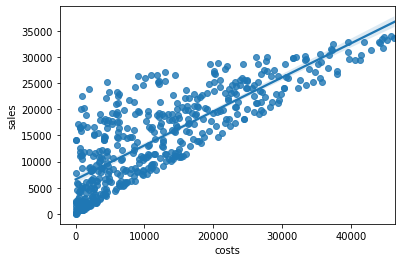

In [16]:
# построим визуализацию того, что казалось бы, должно работать
import seaborn as sns
import matplotlib.pyplot as plt
sns.regplot(x = data['costs'], y = data['sales'], data=data, fit_reg=True)
plt.show()
# видим выбросы и их безумно много

In [17]:
# Попробуем с другим параметром
X = data[['visits']]
y = data['sales']
reg = LinearRegression().fit(X, y)
print('Weights: {}'.format(reg.coef_))
print('Bias: {}'.format(reg.intercept_))

pred_values = reg.predict(data[['visits']])
print('Error, %: {}'.format(mean_absolute_error(pred_values, y) * 100 / data.sales.mean()))

# значительно меньше, чем в первом варианте, но с точки зрения практики, возможно это допустимая ошибка в данном значении

Weights: [121.78287878]
Bias: -156.0411688064196
Error, %: 8.200179155090538


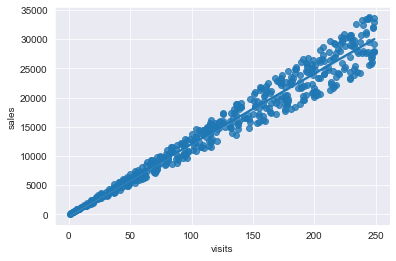

In [80]:
# построим визуализацию
import seaborn as sns
import matplotlib.pyplot as plt
sns.regplot(x = data['visits'], y = data['sales'], data=data, fit_reg=True)
plt.show()